<a href="https://colab.research.google.com/github/somiljain7/AI/blob/master/btc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn
!pip install fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install search_sampler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.5 MB/s 
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.11
    Uninstalling google-api-python-client-1.12.11:
      Successfully uninstalled google-api-python-client-1.12.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
firebase-admin 4.4.0 requires google-api-python-client>=1.7.8, but you have google-api-python-client 1.6.5 which is incompatible.
earthengine-api 0.1.315 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 1.6.5 which is incompatible.


In [4]:
import os
import sys
import fbprophet
import datetime
import holidays
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as pyplot
from datetime import date
from statistics import mode
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from matplotlib import pyplot as plt
from statsmodels.tsa import seasonal
from statsmodels.tsa import stattools
from search_sampler import SearchSampler
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
btc=pd.read_csv('btc.csv')

In [6]:
btc

,date,BTC
0,2019-01-01 00:00:00,47
1,2019-01-01 01:00:00,33
2,2019-01-01 02:00:00,44
3,2019-01-01 03:00:00,40
4,2019-01-01 04:00:00,42
...,...,...
26433,2021-12-31 20:00:00,94
26434,2021-12-31 21:00:00,76
26435,2021-12-31 22:00:00,65
26436,2021-12-31 23:00:00,51


In [7]:
btc['Dates'] = pd.to_datetime(btc['date']).dt.date

In [10]:
btc

,date,BTC,Dates
0,2019-01-01 00:00:00,47,2019-01-01
1,2019-01-01 01:00:00,33,2019-01-01
2,2019-01-01 02:00:00,44,2019-01-01
3,2019-01-01 03:00:00,40,2019-01-01
4,2019-01-01 04:00:00,42,2019-01-01
...,...,...,...
26433,2021-12-31 20:00:00,94,2021-12-31
26434,2021-12-31 21:00:00,76,2021-12-31
26435,2021-12-31 22:00:00,65,2021-12-31
26436,2021-12-31 23:00:00,51,2021-12-31


In [12]:
prophetdf=pd.DataFrame()
prophetdf['ds']=btc['date']
prophetdf['y']=btc['BTC']

In [13]:
prophetdf

,ds,y
0,2019-01-01 00:00:00,47
1,2019-01-01 01:00:00,33
2,2019-01-01 02:00:00,44
3,2019-01-01 03:00:00,40
4,2019-01-01 04:00:00,42
...,...,...
26433,2021-12-31 20:00:00,94
26434,2021-12-31 21:00:00,76
26435,2021-12-31 22:00:00,65
26436,2021-12-31 23:00:00,51


In [14]:
m=Prophet()
m.fit(prophetdf)

In [15]:
future=m.make_future_dataframe(periods=365)
future.tail()

,ds
26642,2022-12-28
26643,2022-12-29
26644,2022-12-30
26645,2022-12-31
26646,2023-01-01


In [17]:
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01 00:00:00,55.405466,35.426932,73.749382,55.405466,55.405466,-1.181216,-1.181216,-1.181216,-3.085075,...,2.154192,2.154192,2.154192,-0.250333,-0.250333,-0.250333,0.0,0.0,0.0,54.224250
1,2019-01-01 01:00:00,55.404734,33.657459,74.219193,55.404734,55.404734,-1.981772,-1.981772,-1.981772,-3.946791,...,2.195770,2.195770,2.195770,-0.230751,-0.230751,-0.230751,0.0,0.0,0.0,53.422962
2,2019-01-01 02:00:00,55.404001,35.005107,73.976547,55.404001,55.404001,-0.729490,-0.729490,-0.729490,-2.743576,...,2.225254,2.225254,2.225254,-0.211168,-0.211168,-0.211168,0.0,0.0,0.0,54.674511
3,2019-01-01 03:00:00,55.403269,39.823593,76.445750,55.403269,55.403269,2.339389,2.339389,2.339389,0.287700,...,2.243275,2.243275,2.243275,-0.191586,-0.191586,-0.191586,0.0,0.0,0.0,57.742658
4,2019-01-01 04:00:00,55.402536,42.506345,81.002449,55.402536,55.402536,5.739037,5.739037,5.739037,3.660496,...,2.250546,2.250546,2.250546,-0.172005,-0.172005,-0.172005,0.0,0.0,0.0,61.141573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26642,2022-12-28 00:00:00,62.698148,18.183788,98.222626,29.719234,93.759326,-3.631916,-3.631916,-3.631916,-3.085075,...,1.488286,1.488286,1.488286,-2.035127,-2.035127,-2.035127,0.0,0.0,0.0,59.066232
26643,2022-12-29 00:00:00,62.709968,19.354455,96.749316,29.543842,93.890325,-3.172654,-3.172654,-3.172654,-3.085075,...,1.531517,1.531517,1.531517,-1.619096,-1.619096,-1.619096,0.0,0.0,0.0,59.537314
26644,2022-12-30 00:00:00,62.721788,19.084095,99.130364,29.410255,94.021324,-3.430405,-3.430405,-3.430405,-3.085075,...,0.832271,0.832271,0.832271,-1.177601,-1.177601,-1.177601,0.0,0.0,0.0,59.291384
26645,2022-12-31 00:00:00,62.733608,19.013339,94.958848,29.233522,94.152324,-3.841214,-3.841214,-3.841214,-3.085075,...,-0.037581,-0.037581,-0.037581,-0.718557,-0.718557,-0.718557,0.0,0.0,0.0,58.892395


In [18]:
erroranalytics = m.predict(prophetdf)
erroranalytics['BTC'] = prophetdf['y'] # import real value
erroranalytics['residuals'] = erroranalytics['BTC'] - erroranalytics['yhat'] # compare predict value to real value
erroranalytics['absoluteresiduals'] = abs(erroranalytics['residuals']) # absolute error
# Have a glance
erroranalytics.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,BTC,residuals,absoluteresiduals
0,2019-01-01 00:00:00,55.405466,34.046971,74.598944,55.405466,55.405466,-1.181216,-1.181216,-1.181216,-3.085075,...,-0.250333,-0.250333,-0.250333,0.0,0.0,0.0,54.224250,47,-7.224250,7.224250
1,2019-01-01 01:00:00,55.404734,32.185729,73.796696,55.404734,55.404734,-1.981772,-1.981772,-1.981772,-3.946791,...,-0.230751,-0.230751,-0.230751,0.0,0.0,0.0,53.422962,33,-20.422962,20.422962
2,2019-01-01 02:00:00,55.404001,34.704972,73.976999,55.404001,55.404001,-0.729490,-0.729490,-0.729490,-2.743576,...,-0.211168,-0.211168,-0.211168,0.0,0.0,0.0,54.674511,44,-10.674511,10.674511
3,2019-01-01 03:00:00,55.403269,37.170562,76.423563,55.403269,55.403269,2.339389,2.339389,2.339389,0.287700,...,-0.191586,-0.191586,-0.191586,0.0,0.0,0.0,57.742658,40,-17.742658,17.742658
4,2019-01-01 04:00:00,55.402536,41.656306,82.012850,55.402536,55.402536,5.739037,5.739037,5.739037,3.660496,...,-0.172005,-0.172005,-0.172005,0.0,0.0,0.0,61.141573,42,-19.141573,19.141573


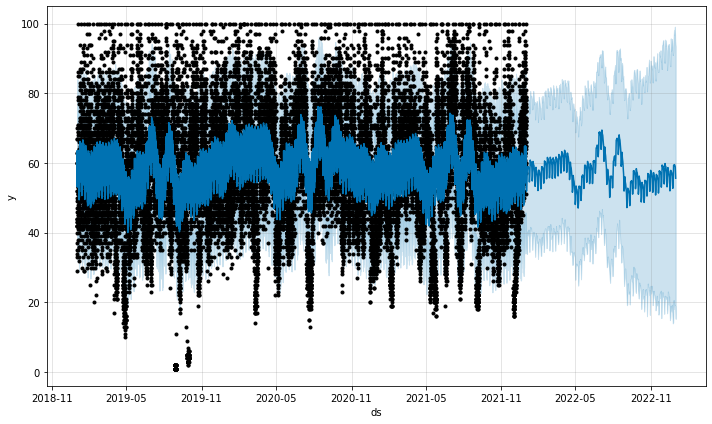

In [19]:
fig1=m.plot(forecast)

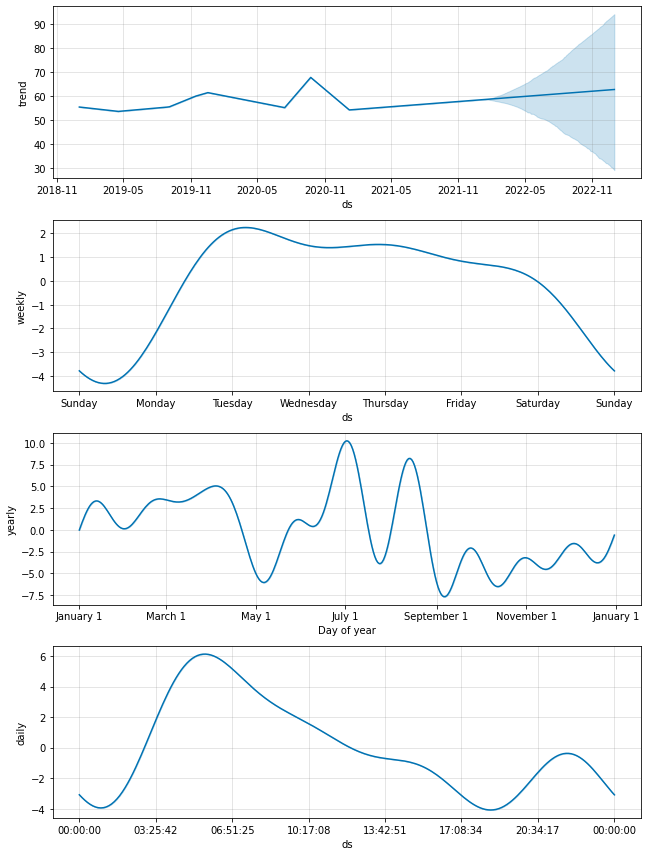

In [20]:
fig2 = m.plot_components(forecast)

In [21]:
totalerror = erroranalytics['absoluteresiduals'].sum()

In [23]:
print(totalerror)
print(totalerror/len(erroranalytics))

321361.9411775261
12.155304530506319


# ***HOLIDAYS BASED FORECAST***

In [28]:
goodholidays = [] # new list for holidays
for i in [2019,2020,2021,2022]:
  for date, name in sorted(holidays.US(years=i).items()): # take an example of 2014
      goodholidays.append(name)
      print(date, name)

2019-01-01 New Year's Day
2019-01-21 Martin Luther King Jr. Day
2019-02-18 Washington's Birthday
2019-05-27 Memorial Day
2019-07-04 Independence Day
2019-09-02 Labor Day
2019-10-14 Columbus Day
2019-11-11 Veterans Day
2019-11-28 Thanksgiving
2019-12-25 Christmas Day
2020-01-01 New Year's Day
2020-01-20 Martin Luther King Jr. Day
2020-02-17 Washington's Birthday
2020-05-25 Memorial Day
2020-07-03 Independence Day (Observed)
2020-07-04 Independence Day
2020-09-07 Labor Day
2020-10-12 Columbus Day
2020-11-11 Veterans Day
2020-11-26 Thanksgiving
2020-12-25 Christmas Day
2021-01-01 New Year's Day
2021-01-18 Martin Luther King Jr. Day
2021-02-15 Washington's Birthday
2021-05-31 Memorial Day
2021-07-04 Independence Day
2021-07-05 Independence Day (Observed)
2021-09-06 Labor Day
2021-10-11 Columbus Day
2021-11-11 Veterans Day
2021-11-25 Thanksgiving
2021-12-24 Christmas Day (Observed)
2021-12-25 Christmas Day
2021-12-31 New Year's Day (Observed)
2021-12-31 New Year's Day (Observed)
2022-01-01 